In [25]:
import io
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
# ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold, train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree

In [26]:
data_raw = pd.read_csv('./train_diabetes.csv')
data_raw.head(10)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1
5,152,4,114,65,0,0,21.9,0.432,37,0
6,173,2,87,0,23,0,28.9,0.773,25,0
7,276,2,100,70,52,57,40.5,0.677,25,0
8,624,0,94,70,27,115,43.5,0.347,21,0
9,443,4,117,64,27,120,33.2,0.230,24,0


# DESCRIPCION


In [27]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [28]:
data_raw.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [29]:
data_raw['diabetes'].value_counts()

0    400
1    214
Name: diabetes, dtype: int64

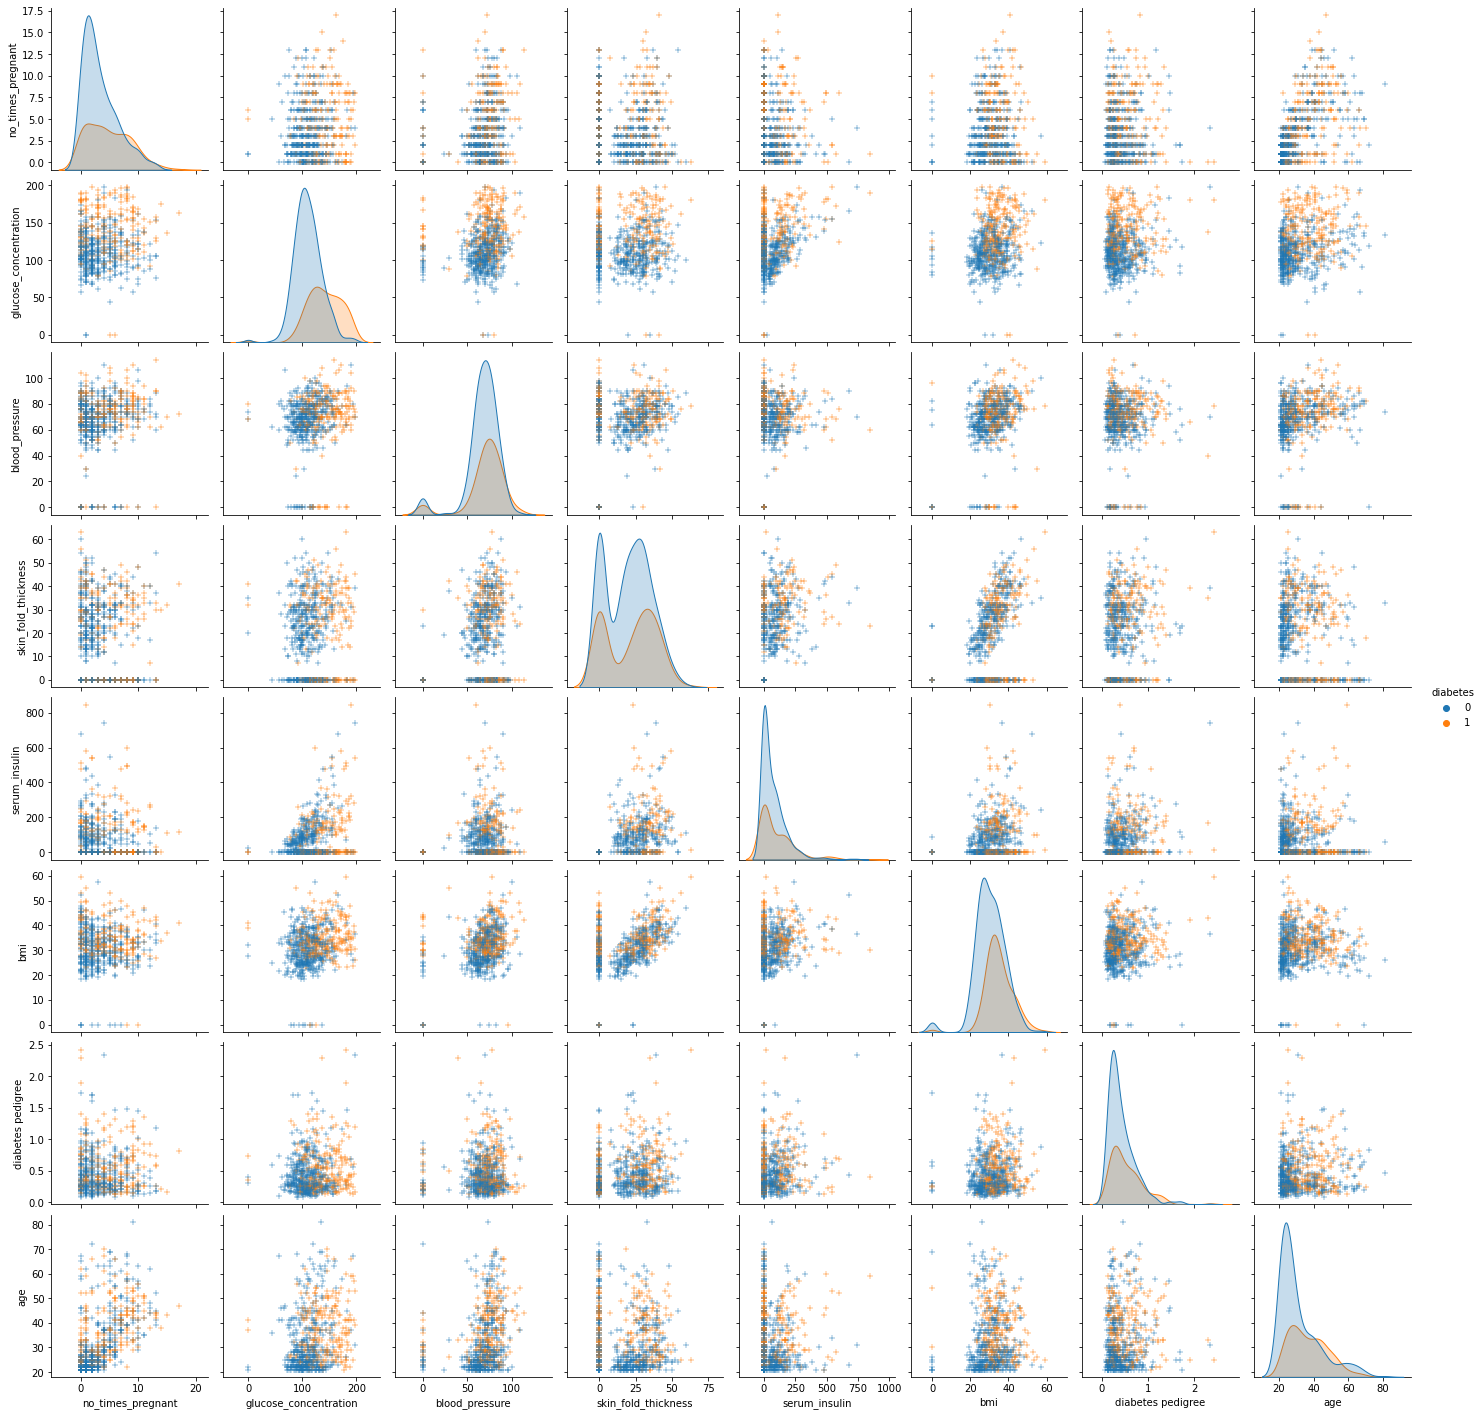

In [30]:
tmp = data_raw.drop('p_id', axis=1)
g = sns.pairplot(tmp, hue='diabetes', markers='+')
plt.show()

In [31]:
list(data_raw.keys())

['p_id',
 'no_times_pregnant',
 'glucose_concentration',
 'blood_pressure',
 'skin_fold_thickness',
 'serum_insulin',
 'bmi',
 'diabetes pedigree',
 'age',
 'diabetes']

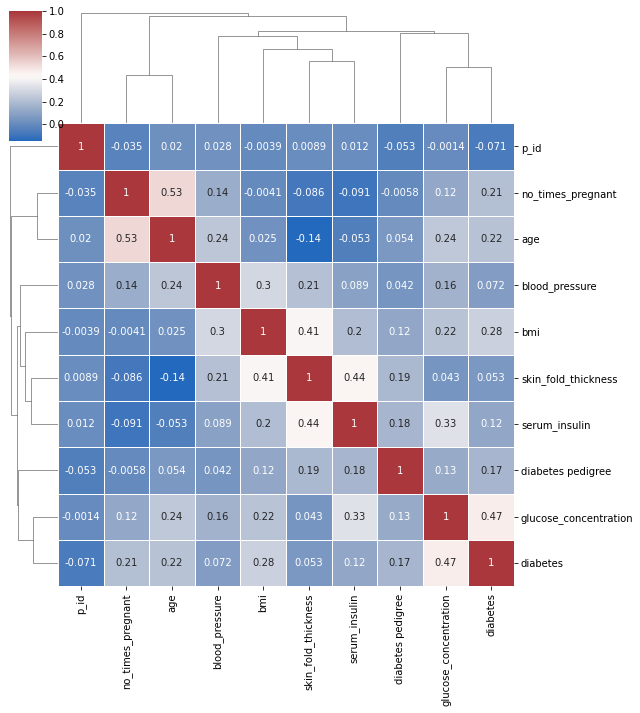

In [32]:
sns.clustermap(data_raw.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

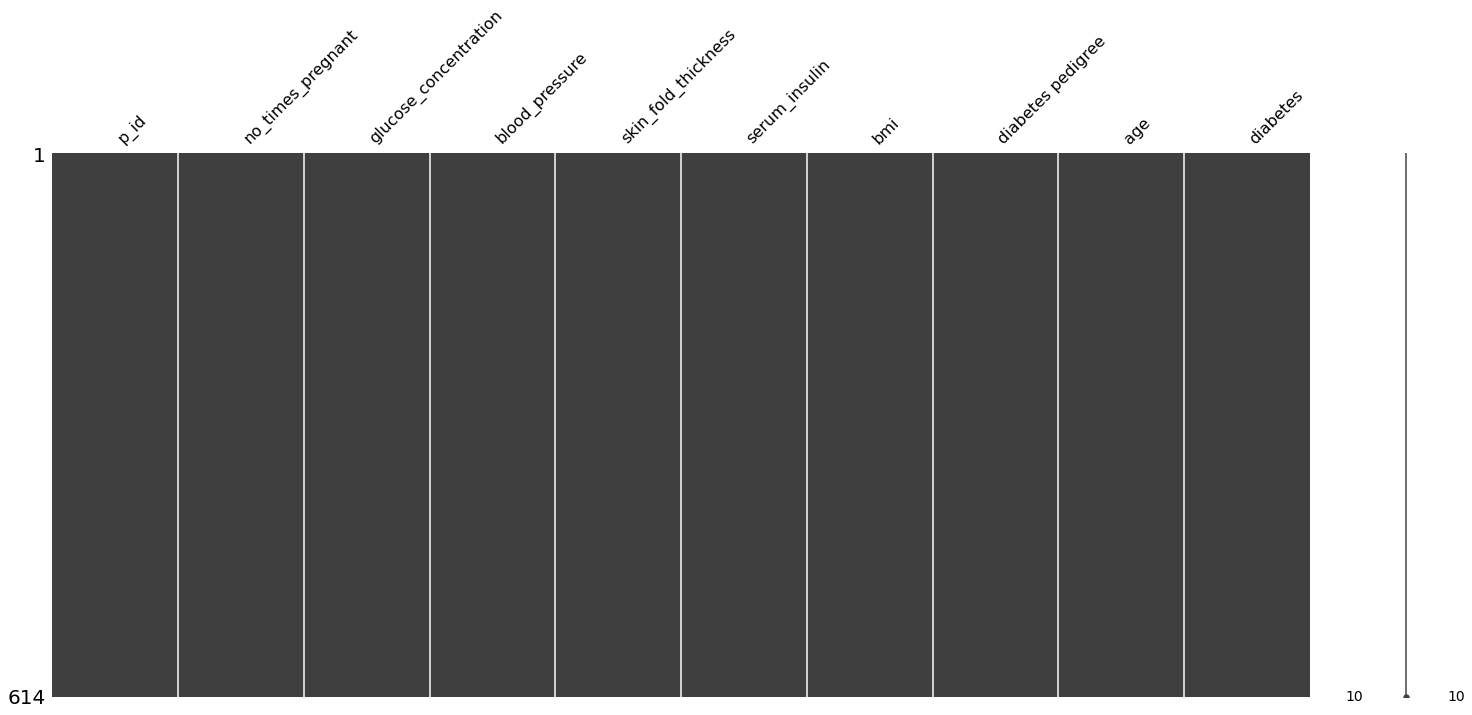

In [33]:
msno.matrix(data_raw)
plt.show()

In [34]:
data_raw.isnull().sum()


p_id                     0
no_times_pregnant        0
glucose_concentration    0
blood_pressure           0
skin_fold_thickness      0
serum_insulin            0
bmi                      0
diabetes pedigree        0
age                      0
diabetes                 0
dtype: int64

<AxesSubplot:>

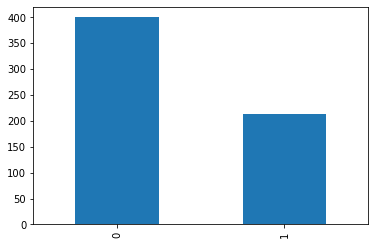

In [35]:
data_raw.diabetes.value_counts().plot(kind="bar")

In [36]:
y = data_raw['diabetes']
y

0      0
1      1
2      1
3      0
4      1
      ..
609    1
610    0
611    0
612    0
613    0
Name: diabetes, Length: 614, dtype: int64

In [37]:
Counter(y)

Counter({0: 400, 1: 214})

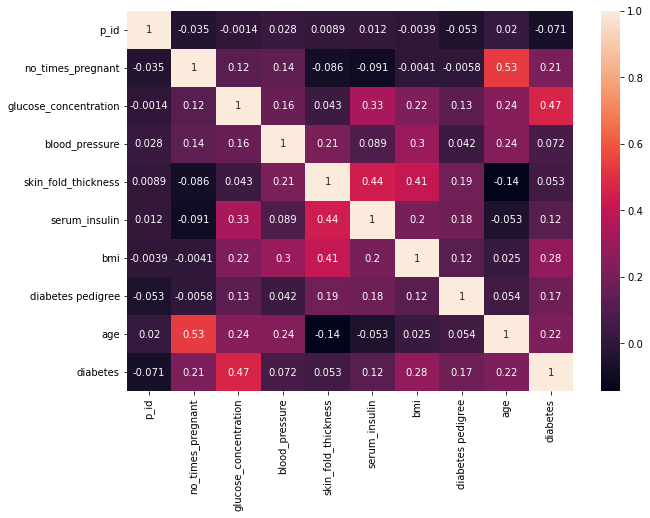

In [38]:
#Verificamos datos no limpiados
sns.heatmap(data_raw.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.show()


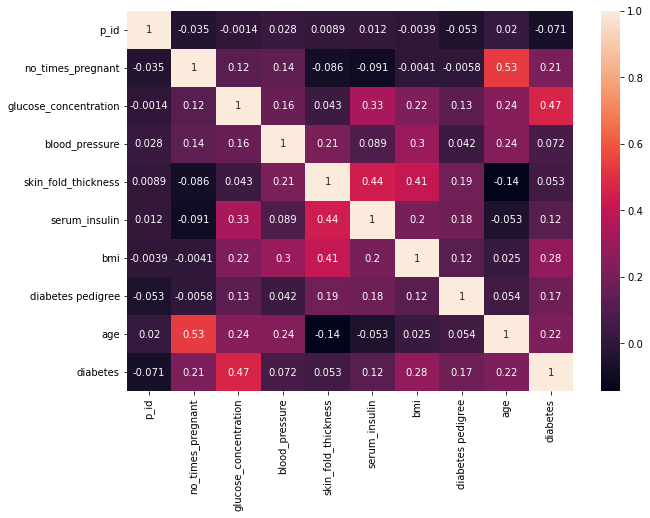

In [39]:
#datos limpios
sns.heatmap(data_raw.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
stdX = StandardScaler()
X = pd.DataFrame(stdX.fit_transform(data_raw.drop(["diabetes"],axis = 1),),
        columns=['p_id','no_times_pregnant','glucose_concentration','blood_pressure','skin_fold_thickness','serum_insulin','bmi','diabetes pedigree','age'])

In [42]:
X.head(100)

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,-0.312297,-0.552371,-0.273558,-0.038469,0.110608,0.124517,0.273718,-0.457475,-0.614583
1,-1.614771,2.129880,0.719178,1.268155,0.803603,0.566641,0.586172,-0.641865,1.482759
2,1.451191,-0.552371,-0.882009,-0.239488,0.740603,0.685674,0.761146,0.627706,-0.866264
3,1.218447,-0.850399,-0.017368,0.564589,1.748595,1.025770,0.873630,2.102825,0.643822
4,0.699247,-0.254343,0.238822,0.162550,0.299607,0.940746,0.061249,0.249857,-0.530689
...,...,...,...,...,...,...,...,...,...
95,1.052840,-0.552371,-0.273558,0.866117,1.370598,0.685674,0.811139,-0.666047,-0.446795
96,-1.149282,-0.850399,-0.113439,0.966627,0.236607,0.558139,0.323711,-0.191469,0.559929
97,0.054724,-1.148427,0.334893,-0.138978,1.244599,-0.674707,0.298714,-0.817186,-0.950157
98,-0.280966,-1.148427,0.110727,0.062041,-0.015391,-0.674707,-0.563659,-0.641865,0.224354


In [43]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2, random_state=40)

In [44]:
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

In [45]:
softmax = LogisticRegression(multi_class="multinomial", solver="lbfgs")

In [47]:
softmax.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [49]:
y_predict = softmax.predict(X_test)
y_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [68]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold

C:\Users\CARLOS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


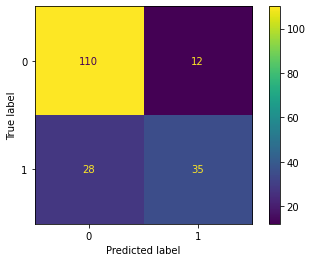

In [56]:
plot_confusion_matrix(softmax, X_test, y_test) 
plt.show()  

In [57]:
f1 = f1_score(y_test, y_predict, average="macro")
precision = precision_score(y_test, y_predict, average="macro")
recall = recall_score(y_test, y_predict, average="macro")
accuracy = accuracy_score(y_test, y_predict, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.7412587412587412
Precision:  0.7708911501695961
Recall:  0.7285974499089254
Accuracy:  0.7837837837837838


In [61]:
Models = [('LR', LogisticRegression()),'RF', RandomForestClassifier(),'GB',GradientBoostingClassifier()]

In [80]:
resultados = []
labels = []

In [88]:
models = [('LR', LogisticRegression()),
          ('GB',GradientBoostingClassifier()),
          ('RF', RandomForestClassifier())
          ]
results = []
labels = []

for label, model in models:
    kfold = KFold(n_splits=14)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    labels.append(label)
    msg = "%s: %f std:(%f)" % (label, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.751152 std:(0.066831)
GB: 0.723041 std:(0.101293)
RF: 0.764900 std:(0.069595)


# Carlos Andres Mendoza Martinez - T00055203